In [1]:
import csv
import requests
from bs4 import BeautifulSoup


def scrape_data(url):

    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find_all('table')[1]

    rows = table.select('tbody>tr')

   
    header = ['Districts','Confirmed','Deaths','Recovered','Readmitted']
   

    with open('records.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(header)
        for row in rows:
            data = [th.text.strip() for th in row.find_all('td')]
            writer.writerow(data)
            

            
if __name__=="__main__":
    url = "https://kathmandupost.com/covid19"
    scrape_data(url)

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import datetime
from plotly.subplots import make_subplots

import folium
from folium import plugins

from scipy.interpolate import interp1d
import plotly.express as px

In [3]:
corona = pd.read_csv('records.csv')
corona = corona.drop(['Readmitted'],axis=1)
corona.head()

Districts  Confirmed  Deaths  Recovered
0  Kathmandu       6917      38        110
1      Parsa       2491      40        176
2    Sarlahi       2134       5        628
3   Rautahat       1918       5        750
4     Morang       1888      21        218

In [4]:
corona['Active']=corona['Confirmed']-(corona['Recovered']+corona['Deaths'])
corona.head()

Districts  Confirmed  Deaths  Recovered  Active
0  Kathmandu       6917      38        110    6769
1      Parsa       2491      40        176    2275
2    Sarlahi       2134       5        628    1501
3   Rautahat       1918       5        750    1163
4     Morang       1888      21        218    1649

In [5]:
pyo.iplot([{
    'x' : corona.Districts,
    'y' : corona.Confirmed
}])

In [6]:
corona.loc[corona['Districts'] == 'Kathmandu']

Districts  Confirmed  Deaths  Recovered  Active
0  Kathmandu       6917      38        110    6769

In [7]:
corona.loc[corona['Districts']=='Tanahun']

Districts  Confirmed  Deaths  Recovered  Active
39   Tanahun        329       3        161     165

In [8]:
corona.loc[corona['Districts']=='Kaski']

Districts  Confirmed  Deaths  Recovered  Active
29     Kaski        481       7        104     370

In [9]:
corona.loc[corona['Districts']=='Lalitpur']

Districts  Confirmed  Deaths  Recovered  Active
16  Lalitpur        938       7         30     901

In [10]:
corona.loc[corona['Districts']=='Bhaktapur']

Districts  Confirmed  Deaths  Recovered  Active
21  Bhaktapur        725      10         31     684

In [11]:
current_status = {'Total confirmed':sum(corona['Confirmed']),
                  'Total Deaths':sum(corona['Deaths']),
                  'Total Recovered':sum(corona['Recovered']),
                  'Active Cases': sum(corona['Active'])
    
                }

In [12]:
current_status

{'Total confirmed': 47236,
 'Total Deaths': 300,
 'Total Recovered': 30677,
 'Active Cases': 16259}

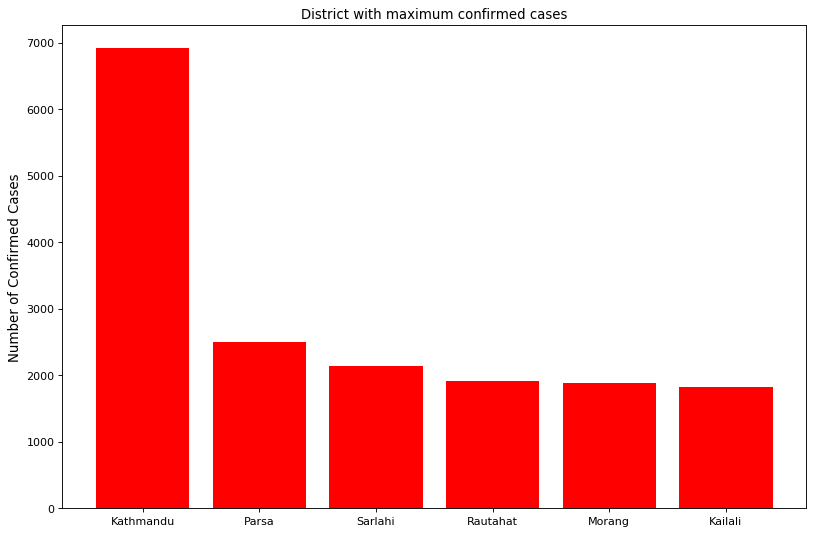

In [13]:
corona_latest = corona.sort_values(by=['Confirmed'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Confirmed'][:6], align='center', color='red')
plt.ylabel('Number of Confirmed Cases', size=12)
plt.title('District with maximum confirmed cases', size=12)
plt.show()

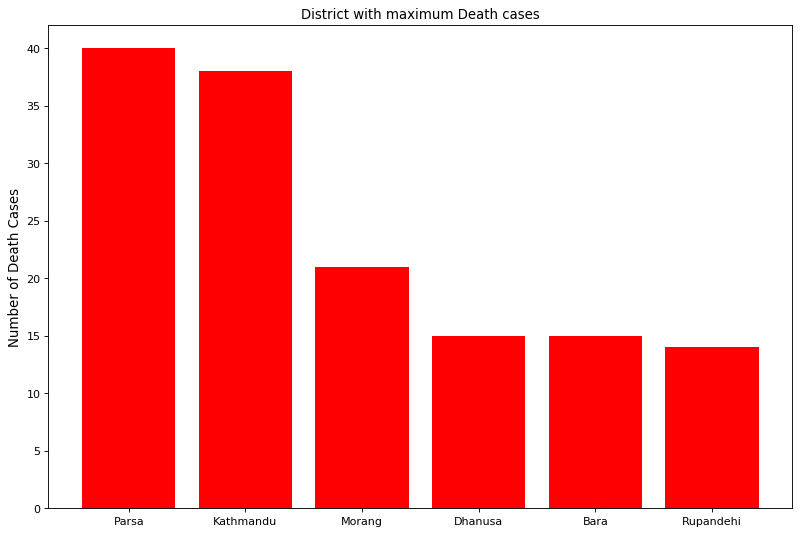

In [14]:
corona_latest = corona.sort_values(by=['Deaths'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Deaths'][:6], align='center', color='red')
plt.ylabel('Number of Death Cases', size=12)
plt.title('District with maximum Death cases', size=12)
plt.show()

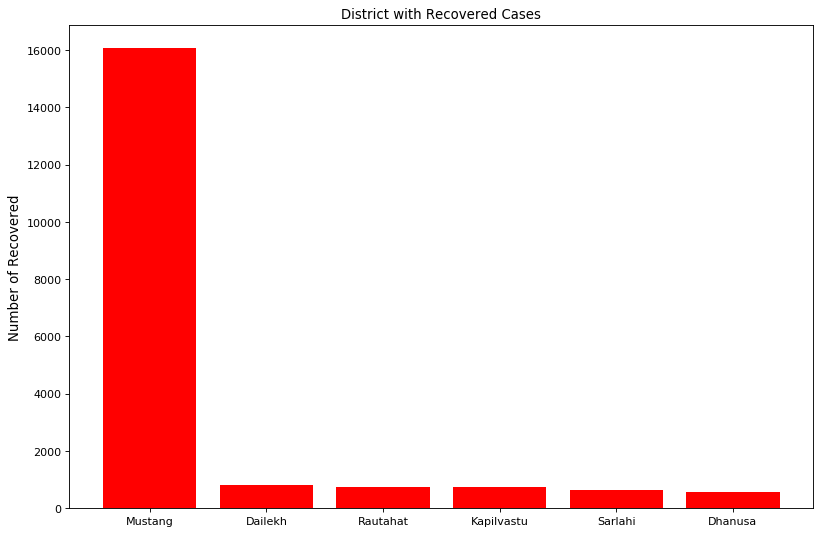

In [15]:
corona_latest = corona.sort_values(by=['Recovered'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Recovered'][:6], align='center', color='red')
plt.ylabel('Number of Recovered', size=12)
plt.title('District with Recovered Cases', size=12)
plt.show()

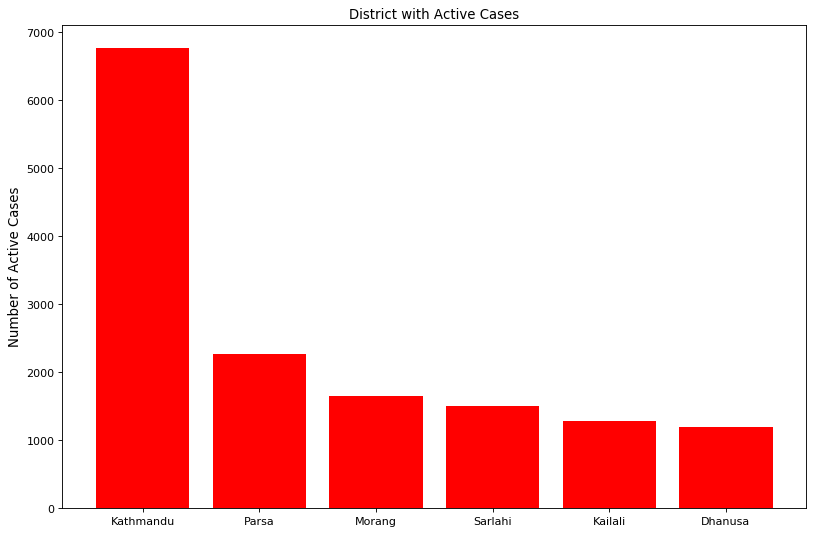

In [16]:
corona_latest = corona.sort_values(by=['Active'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Active'][:6], align='center', color='red')
plt.ylabel('Number of Active Cases', size=12)
plt.title('District with Active Cases', size=12)
plt.show()

In [17]:
coordinate = pd.read_csv('Districts-Coordinate.csv')
coordinate

Districts  Longitude  Latitude
0         Achham    81.2519   29.0396
1   Arghakhanchi    83.0361   27.9829
2        Baglung    83.2201   28.3491
3        Baitadi    80.4688   29.5186
4        Bajhang    81.2519   29.7767
..           ...        ...       ...
72       Syangja    83.8049   28.0197
73       Tanahun    84.2279   27.9447
74     Taplejung    87.7763   27.6257
75     Terhathum    87.5377   27.1508
76      Udayapur    86.7014   26.8998

[77 rows x 3 columns]

In [18]:
corona.style.background_gradient(cmap='Reds')

In [19]:
COVID19= pd.merge(corona,coordinate,on="Districts")
COVID19.head()

Districts  Confirmed  Deaths  Recovered  Active  Longitude  Latitude
0  Kathmandu       6917      38        110    6769    85.3240   27.7172
1      Parsa       2491      40        176    2275    84.8568   27.1736
2    Sarlahi       2134       5        628    1501    85.5612   26.9627
3   Rautahat       1918       5        750    1163    85.3136   27.0487
4     Morang       1888      21        218    1649    87.4604   26.6799

In [20]:
list1 = corona.Confirmed.tolist()

m=interp1d([0,max(list1)],[5,18])

circle_radius = m(list1)

typelist=['open-street-map','white-bg','carto-positron','stamen-terrain','stamen-toner','stamen-watercolor']

for i in typelist:
    print(i)
    fig=px.density_mapbox(COVID19, lat='Latitude', lon='Longitude',hover_name='Districts', radius=circle_radius, zoom=6,title='COVID-19 map of Nepal', mapbox_style=i)
    fig.show()

open-street-map


white-bg


carto-positron


stamen-terrain


stamen-toner


stamen-watercolor


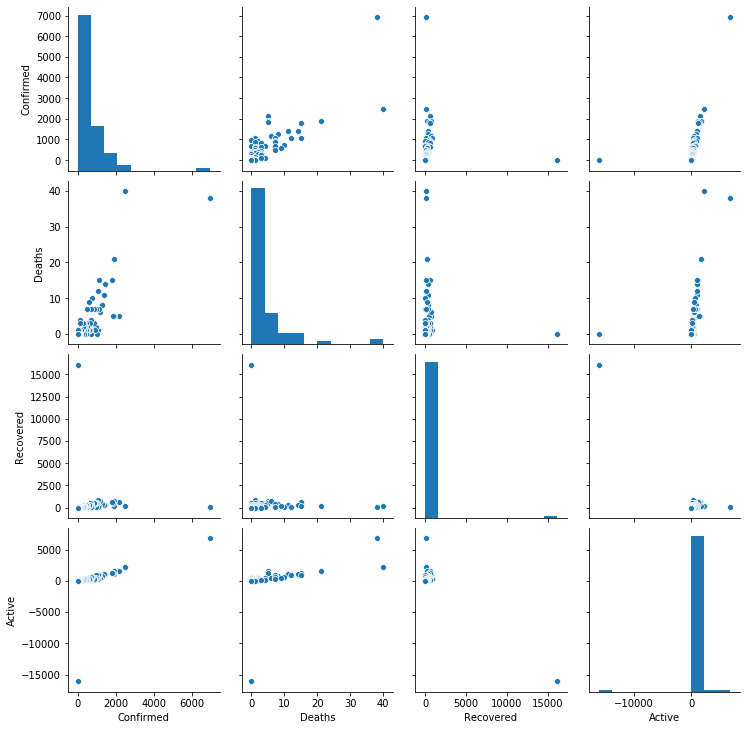

In [21]:
sns.pairplot(corona)

D:\installed-apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



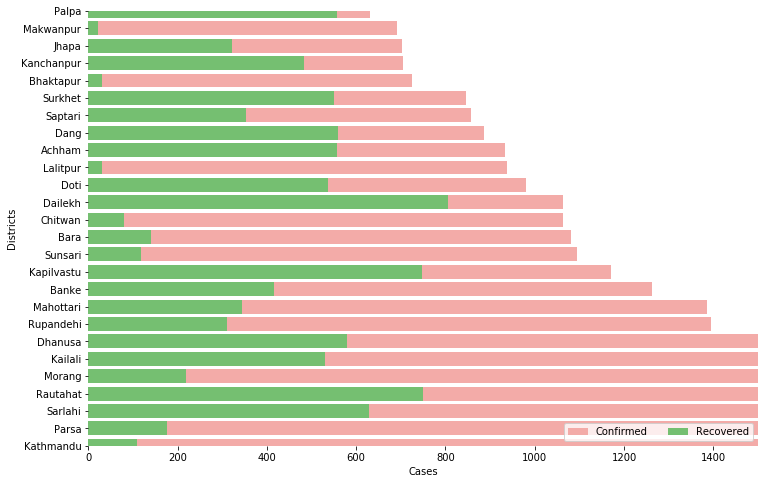

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
data = corona[['Districts','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Districts", data=corona,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Districts", data=corona, label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500),ylim=(0,25), ylabel="Districts",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [23]:
fig = go.Figure(data=[go.Bar(
            x=corona['Districts'][0:10], y=corona['Confirmed'][0:10],
            text=corona['Confirmed'][0:10],
            textposition='auto',
            marker_color='blue',
            

        )])
fig.update_layout(
    title='Ten most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
        template='plotly_dark'

)
fig.show()

In [24]:
fig = go.Figure(data=[go.Scatter(
    x=corona['Districts'][0:10],
    y=corona['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(corona['Confirmed'][0:10]/10),
        showscale=True
        )
)])

fig.update_layout(
    title='10 Most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

In [25]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [26]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_districts['Districts'][0:10], y=Recovered_per_districts['Recovered'][0:10],
            text=Recovered_per_districts['Recovered'][0:10],
            textposition='auto',
            marker_color='red',

        )])
fig.update_layout(
    title='10 Most Recovered Districts',
    xaxis_title="Districts",
    yaxis_title="Recovered Cases",
    template='plotly_dark'
)
fig.show()

In [27]:
Active_per_district= corona.groupby(["Districts"])["Active"].sum().reset_index().sort_values("Active",ascending=False).reset_index(drop=True)

In [28]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Districts</b>','<b>Active Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Active_per_district['Districts'],
      Active_per_district['Active'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(corona)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Active Cases In Each Districts',
    template='plotly_dark'
)
fig.show()

In [29]:
fig = go.Figure(data=[go.Bar(
            x=Active_per_district['Districts'][0:10], y=Active_per_district['Active'][0:10],
            text=Active_per_district['Active'][0:10],
            marker_color='yellow',
           
        )])
fig.update_layout(
    title='10 Most Active Cases Districts',
    xaxis_title="Districts",
    yaxis_title="Active Cases",
    template='plotly_dark'
)
fig.show()

In [30]:
Deaths_per_district = corona.groupby(["Districts"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

In [31]:
fig = go.Figure(data=[go.Bar(
            x=Deaths_per_district['Districts'][0:10], y=Deaths_per_district['Deaths'][0:10],
            text=Deaths_per_district['Deaths'][0:10],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most death districts',
    xaxis_title="Districts",
    yaxis_title="Deaths",
        template='plotly_dark'

)
fig.show()

In [32]:
fig = px.pie(corona, values=corona['Confirmed'], 
             names=corona['Districts'],
             title='Conformed cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

In [33]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [34]:
fig = px.pie(Recovered_per_districts, values=Recovered_per_districts['Recovered'], 
             names=Recovered_per_districts['Districts'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

#Time series analyis

In [35]:
Data_Nepal = pd.read_json("https://api.covid19api.com/dayone/country/nepal")
print(Data_Nepal)

    Country CountryCode Province City CityCode    Lat    Lon  Confirmed  \
0     Nepal          NP                         28.39  84.12          1   
1     Nepal          NP                         28.39  84.12          1   
2     Nepal          NP                         28.39  84.12          1   
3     Nepal          NP                         28.39  84.12          1   
4     Nepal          NP                         28.39  84.12          1   
..      ...         ...      ...  ...      ...    ...    ...        ...   
222   Nepal          NP                         28.39  84.12      42877   
223   Nepal          NP                         28.39  84.12      44236   
224   Nepal          NP                         28.39  84.12      45277   
225   Nepal          NP                         28.39  84.12      46257   
226   Nepal          NP                         28.39  84.12      47236   

     Deaths  Recovered  Active                      Date  
0         0          0       1 2020-01-2

In [36]:
Data_Nepal=Data_Nepal.drop(columns=['Country', 'CountryCode','Province', 'City','CityCode','Lat','Lon'])
Data_Nepal.tail()

Confirmed  Deaths  Recovered  Active                      Date
222      42877     257      24207   18413 2020-09-03 00:00:00+00:00
223      44236     271      25561   18404 2020-09-04 00:00:00+00:00
224      45277     280      27127   17870 2020-09-05 00:00:00+00:00
225      46257     289      28941   17027 2020-09-06 00:00:00+00:00
226      47236     300      30677   16259 2020-09-07 00:00:00+00:00

In [37]:
cols = list(Data_Nepal.columns)
Data_Nepal = Data_Nepal[[cols[-1]]+cols[0:4]]
Data_Nepal.head()

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-25 00:00:00+00:00          1       0          0       1
1 2020-01-26 00:00:00+00:00          1       0          0       1
2 2020-01-27 00:00:00+00:00          1       0          0       1
3 2020-01-28 00:00:00+00:00          1       0          0       1
4 2020-01-29 00:00:00+00:00          1       0          0       1

In [38]:
Data_Nepal['Date'] = Data_Nepal['Date'].dt.date

In [39]:
Data_Nepal.tail()

Date  Confirmed  Deaths  Recovered  Active
222  2020-09-03      42877     257      24207   18413
223  2020-09-04      44236     271      25561   18404
224  2020-09-05      45277     280      27127   17870
225  2020-09-06      46257     289      28941   17027
226  2020-09-07      47236     300      30677   16259

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Nepal',
    template='plotly_dark',

)

fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Confirmed'],
                    mode='markers',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [42]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Active'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Acitive cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in Nepal',
        template='plotly_dark'

)

fig.show()

#Using fbprophet for Forecast

In [44]:
from fbprophet import Prophet

In [45]:
df = Data_Nepal.copy()
df.tail()

Date  Confirmed  Deaths  Recovered  Active
222  2020-09-03      42877     257      24207   18413
223  2020-09-04      44236     271      25561   18404
224  2020-09-05      45277     280      27127   17870
225  2020-09-06      46257     289      28941   17027
226  2020-09-07      47236     300      30677   16259

In [46]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['Active'].reset_index()

#For Confirmed Cases


In [47]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [48]:
confirmed.tail()

ds      y
222 2020-09-03  42877
223 2020-09-04  44236
224 2020-09-05  45277
225 2020-09-06  46257
226 2020-09-07  47236

In [49]:
c = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
c.fit(confirmed)
confirmed_future = c.make_future_dataframe(periods=7,include_history = True)
confirmed_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
229 2020-09-10
230 2020-09-11
231 2020-09-12
232 2020-09-13
233 2020-09-14

In [50]:
#predicting the future with date,upper limit and lower limit of y value

confirmed_forecast = c.predict(confirmed_future)
confirmed_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
229 2020-09-10  50736.934520  50601.250738  50859.147521
230 2020-09-11  51825.134001  51688.308769  51955.224444
231 2020-09-12  52830.464749  52679.276934  52982.028528
232 2020-09-13  53818.127986  53647.553756  53976.337360
233 2020-09-14  54764.674622  54583.938948  54947.547224

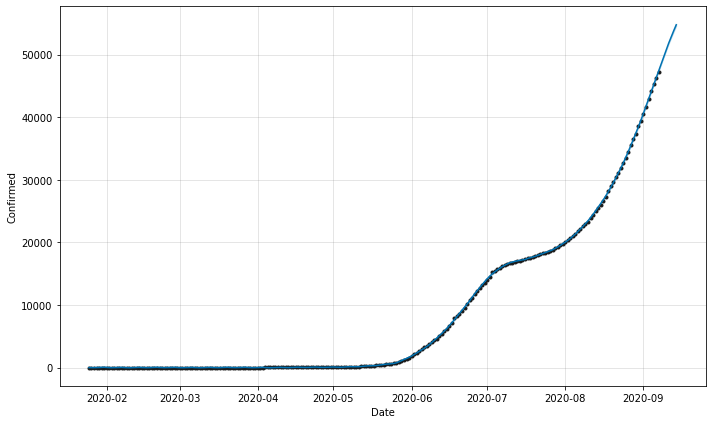

In [51]:
confirmed_forecast_plot = c.plot(confirmed_forecast, xlabel = 'Date', ylabel='Confirmed')

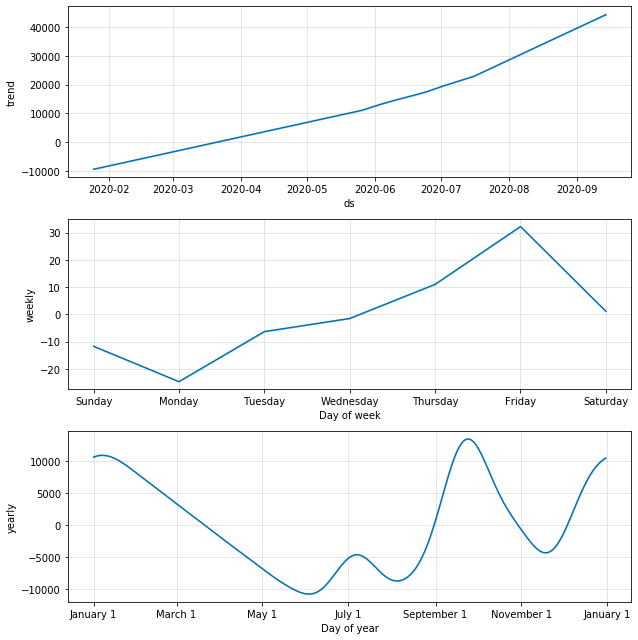

In [52]:
confirmed_forecast_plot = c.plot_components(confirmed_forecast)

#For Death Cases

In [53]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [54]:
death.tail()

ds    y
222 2020-09-03  257
223 2020-09-04  271
224 2020-09-05  280
225 2020-09-06  289
226 2020-09-07  300

In [55]:
d = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
d.fit(death)
death_future = d.make_future_dataframe(periods=7,include_history = True)
death_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
229 2020-09-10
230 2020-09-11
231 2020-09-12
232 2020-09-13
233 2020-09-14

In [56]:
death_forecast = d.predict(death_future)
death_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
229 2020-09-10  323.184380  321.240966  325.268779
230 2020-09-11  329.493869  327.636367  331.381854
231 2020-09-12  334.262185  332.268365  336.210223
232 2020-09-13  337.340324  335.237466  339.300366
233 2020-09-14  339.086393  337.101368  341.035045

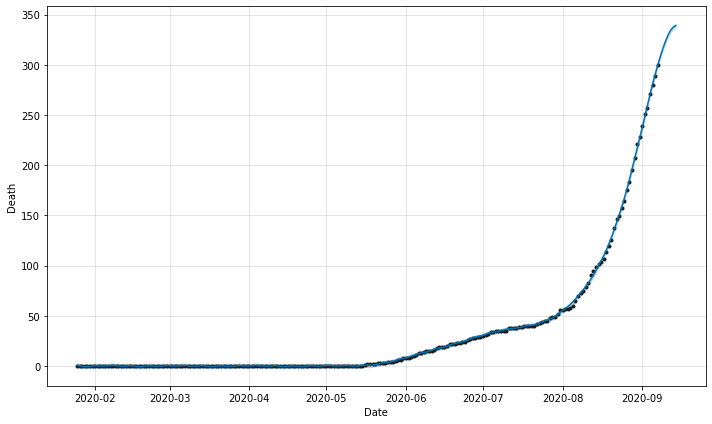

In [57]:
death_forecast_plot = d.plot(death_forecast,xlabel = 'Date', ylabel='Death')

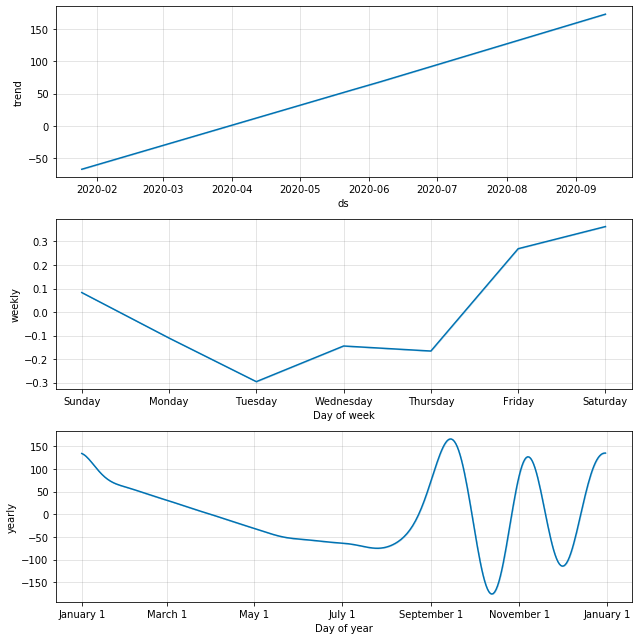

In [58]:
death_forecast_plot = d.plot_components(death_forecast)

#For Recovered Cases

In [59]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [60]:
recovered.tail()

ds      y
222 2020-09-03  24207
223 2020-09-04  25561
224 2020-09-05  27127
225 2020-09-06  28941
226 2020-09-07  30677

In [61]:
r = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
r.fit(recovered)
recovered_future = r.make_future_dataframe(periods=7,include_history = True)
recovered_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
229 2020-09-10
230 2020-09-11
231 2020-09-12
232 2020-09-13
233 2020-09-14

In [62]:
recovered_forecast = r.predict(recovered_future)
recovered_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
229 2020-09-10  36081.257771  35731.096194  36439.275778
230 2020-09-11  38244.546522  37883.757937  38599.515417
231 2020-09-12  40484.462340  40154.365349  40856.831446
232 2020-09-13  42785.626062  42420.793198  43141.925465
233 2020-09-14  45221.115105  44875.300508  45553.691235

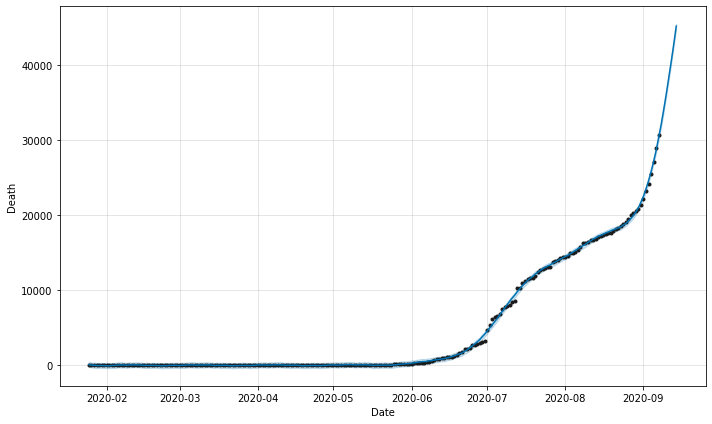

In [63]:
recovered_forecast_plot = r.plot(recovered_forecast,xlabel = 'Date', ylabel='Death')

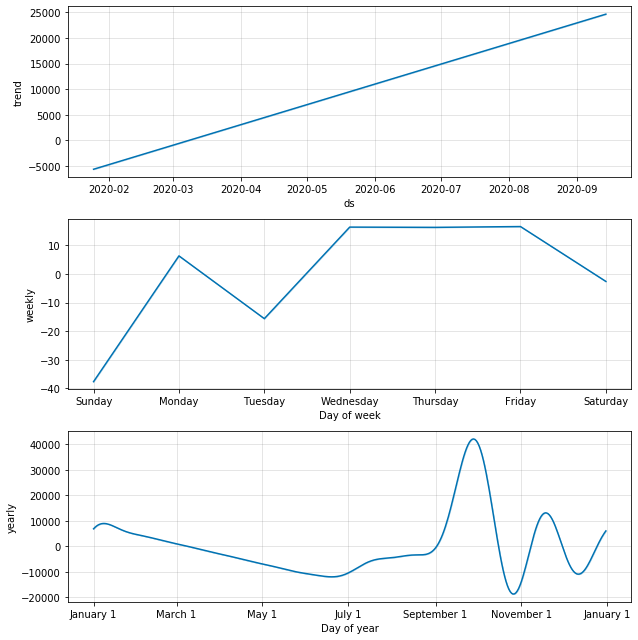

In [64]:
recovered_forecast_plot = r.plot_components(recovered_forecast)

#For Active Cases`

In [65]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [66]:
active.tail()

ds      y
222 2020-09-03  18413
223 2020-09-04  18404
224 2020-09-05  17870
225 2020-09-06  17027
226 2020-09-07  16259

In [67]:
a = Prophet(interval_width=0.95,yearly_seasonality = True, seasonality_prior_scale=0.1)
a.fit(active)
active_future = a.make_future_dataframe(periods=7,include_history = True)
active_future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
229 2020-09-10
230 2020-09-11
231 2020-09-12
232 2020-09-13
233 2020-09-14

In [68]:
active_forecast = a.predict(active_future)
active_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
229 2020-09-10  14384.871730  14022.834127  14785.744025
230 2020-09-11  13301.558067  12939.851722  13658.020000
231 2020-09-12  12054.452017  11638.962685  12445.210813
232 2020-09-13  10716.163208  10353.552986  11111.185969
233 2020-09-14   9192.000935   8819.596353   9608.279390

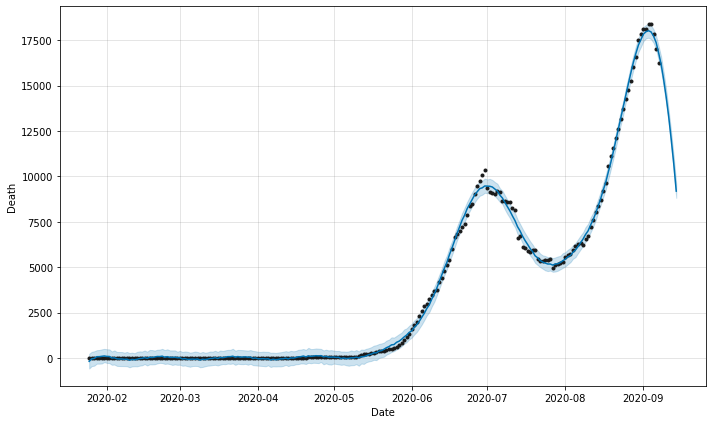

In [69]:
active_forecast_plot = a.plot(active_forecast,xlabel = 'Date', ylabel='Death')

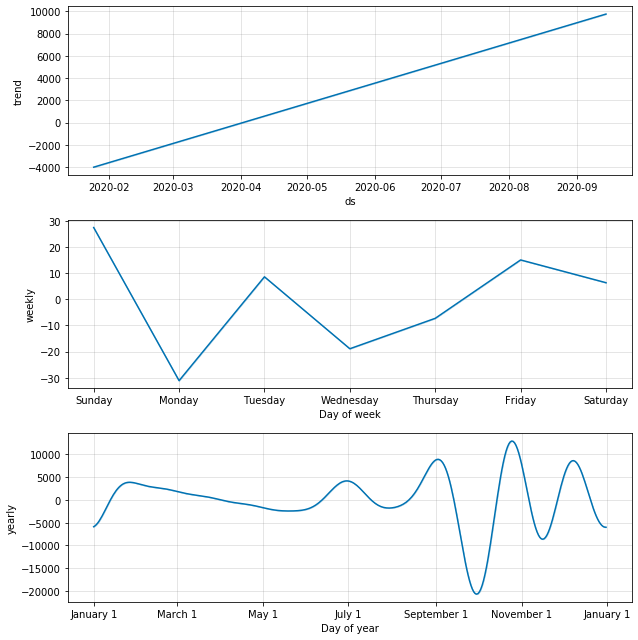

In [70]:
active_forecast_plot = a.plot_components(active_forecast)